**MACHINE LEARNING**


In this step, I will perform regression to predict tmbd_revenue in my dataset
I will use 3 methods
1) Random Forest
2) Gradient Boosting
3) Linear Regression

In [485]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [486]:
df = pd.read_csv("dataset.csv")

In [487]:
df['log_budget'] = np.log1p(df['tmdb_budget'])
df['log_votes'] = np.log1p(df['numVotes'])
df['decade'] = (df['releaseYear'] // 10) * 10
df['num_genres'] = df['genres_list'].apply(len)

#some feature engineering to transform our budget-votes data etc.

In [488]:
#encode genres with multilabelbinarizer
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genres_list']), columns=mlb.classes_)
df = df.join(genre_dummies)

In [489]:
feature_cols = ['log_budget', 'averageRating', 'log_votes', 'originalScoreNum',
                'isFresh', 'decade', 'num_genres'] + list(mlb.classes_)

X = df[feature_cols]
y = df['tmdb_profit']
#features and target

In [490]:
#fill missing values to not crash in linear regression
X = X.copy()
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])


In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# => %80 train data and %20 test data

In [492]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
#train the random forest model

Now Let's try with linear regression.

In [493]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
#train linear regression model

In [494]:
#train Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
gbr_r2 = r2_score(y_test, gbr_pred)

In [495]:
#print the test results
results = pd.DataFrame({
    "Model": ["Random Forest", "Linear Regression", "Gradient Boosting"],
    "RMSE": [rf_rmse, lr_rmse, gbr_rmse],
    "R² Score": [rf_r2, lr_r2, gbr_r2]
})
print(results)

               Model          RMSE  R² Score
0      Random Forest  1.111670e+08  0.582769
1  Linear Regression  1.489697e+08  0.250761
2  Gradient Boosting  1.125221e+08  0.572536


In [496]:
import matplotlib.pyplot as plt
import seaborn as sns

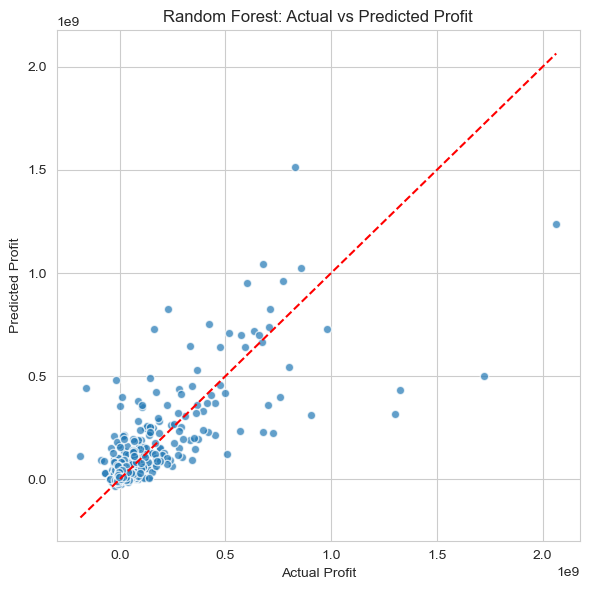

In [497]:
#Actual vs. Predicted => Random Forest
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_pred, alpha=0.7, edgecolors="w")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Random Forest: Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

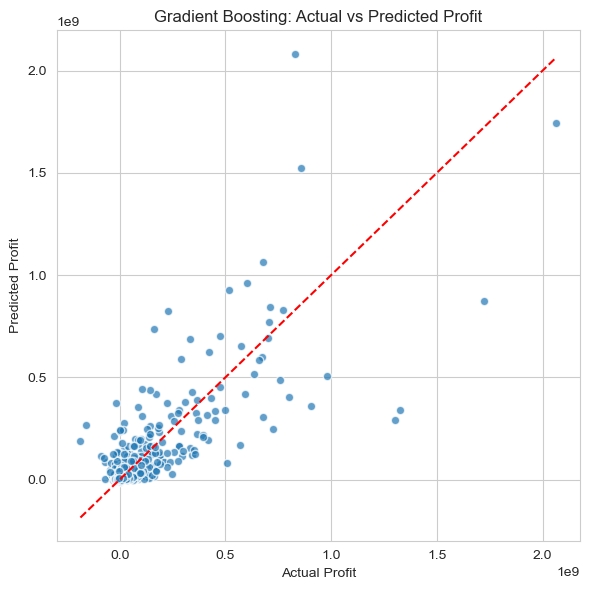

In [498]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, gbr_pred, alpha=0.7, edgecolors="w")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Gradient Boosting: Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

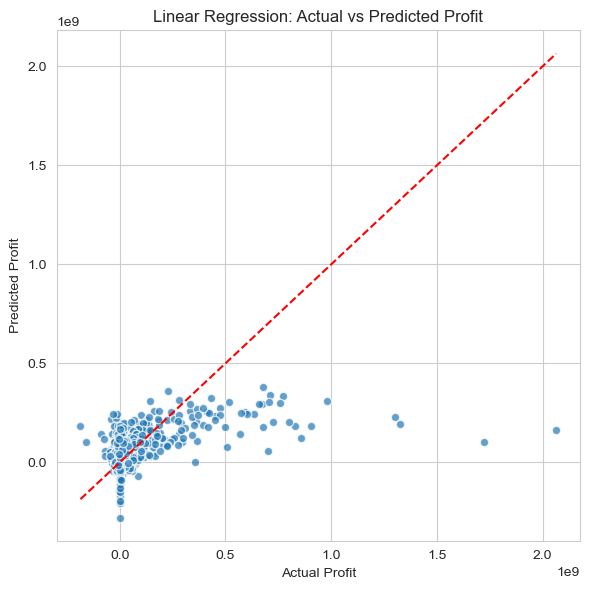

In [499]:
# 5. Actual vs Predicted — Linear Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, lr_pred, alpha=0.7, edgecolors="w")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

Now I will perform classification on my dataset, I will predict the rating_group as "low", "mid", "high"
a very good insight for studios, this prediction will based on features that are known before making the film

In [500]:
df1 = pd.read_csv("dataset.csv")
df1 = df1.dropna(subset=["averageRating"])
#reset the database to original form

In [501]:
#create the categories for imbd rating
def categorize_rating(rating):
    if rating < 6.0:
        return 'low'
    elif rating < 7.5:
        return 'mid'
    else:
        return 'high'
df1['rating_group'] = df1['averageRating'].apply(categorize_rating)

In [502]:
#fill numeric fields with mean
numeric_cols = df1.select_dtypes(include=[np.number]).columns
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].mean())

In [503]:
# Fill categorical columns with mode
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

In [504]:
#define features and target
df1['log_budget'] = np.log1p(df1['tmdb_budget'])
df1['log_votes'] = np.log1p(df1['numVotes'])
df1['decade'] = (df1['releaseYear'] // 10) * 10
df1['num_genres'] = df1['genres_list'].apply(len)
mlb1 = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb1.fit_transform(df1['genres_list']), columns=mlb1.classes_)
df1 = df1.join(genre_dummies)
# Define features
feature_cols = ['log_budget', 'log_votes', 'averageRating', 'originalScoreNum',
                'isFresh', 'decade', 'num_genres'] + list(mlb1.classes_)
X1 = df1[feature_cols]
y1 = df1['rating_group']

In [505]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)
## set the train and test sets

In [506]:
#Train the models

# Logistic Regression
lr1 = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr1.fit(X_train_scaled1, y_train1)
lr_preds1 = lr1.predict(X_test_scaled1)

#Random forest
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)
rf_preds1 = rf1.predict(X_test1)

#Naive Bayes
nb1 = GaussianNB()
nb1.fit(X_train_scaled1, y_train1)
nb_preds1 = nb1.predict(X_test_scaled1)

/Users/keremsirtikizil/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


/var/folders/tj/gpd7f9kd1xlg123xhj0ht8f80000gn/T/ipykernel_58991/2615952762.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/keremsirtikizil/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


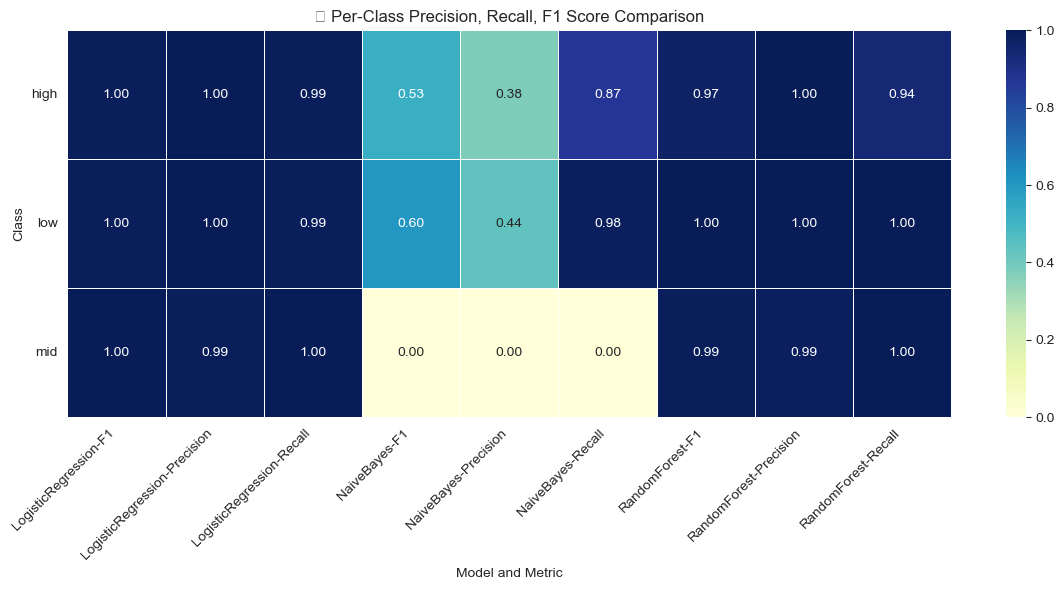

In [507]:
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Get classification reports as dictionaries
report_lr = classification_report(y_test1, lr_preds1, output_dict=True, zero_division=0)
report_rf = classification_report(y_test1, rf_preds1, output_dict=True, zero_division=0)
report_nb = classification_report(y_test1, nb_preds1, output_dict=True, zero_division=0)

# Step 2: Define class labels (ordered)
classes = ['low', 'mid', 'high']

# Step 3: Build DataFrame from all models
report_df = pd.DataFrame({
    'Class': classes,
    'LogisticRegression_Precision': [report_lr[c]['precision'] for c in classes],
    'LogisticRegression_Recall':    [report_lr[c]['recall']    for c in classes],
    'LogisticRegression_F1':        [report_lr[c]['f1-score']  for c in classes],

    'RandomForest_Precision': [report_rf[c]['precision'] for c in classes],
    'RandomForest_Recall':    [report_rf[c]['recall']    for c in classes],
    'RandomForest_F1':        [report_rf[c]['f1-score']  for c in classes],

    'NaiveBayes_Precision': [report_nb[c]['precision'] for c in classes],
    'NaiveBayes_Recall':    [report_nb[c]['recall']    for c in classes],
    'NaiveBayes_F1':        [report_nb[c]['f1-score']  for c in classes],
}).round(3)

# Step 4: Reshape for seaborn
report_melted = report_df.melt(id_vars='Class', var_name='Model_Metric', value_name='Score')
report_melted[['Model', 'Metric']] = report_melted['Model_Metric'].str.split('_', expand=True)

# Step 5: Pivot for heatmap
pivot_table = report_melted.pivot_table(index='Class', columns=['Model', 'Metric'], values='Score')

# Step 6: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("📊 Per-Class Precision, Recall, F1 Score Comparison")
plt.ylabel("Class")
plt.xlabel("Model and Metric")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

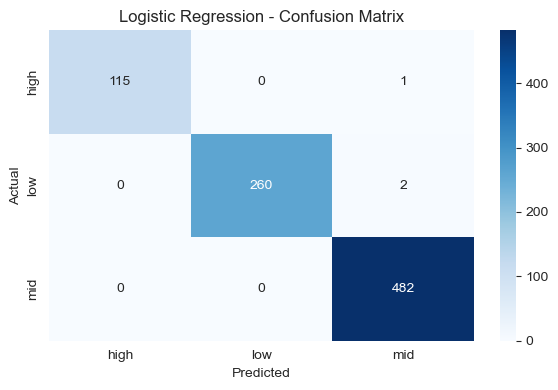

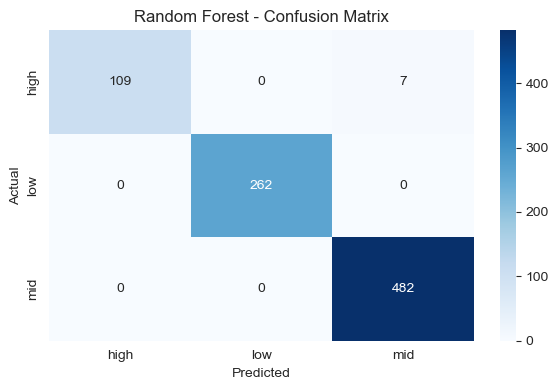

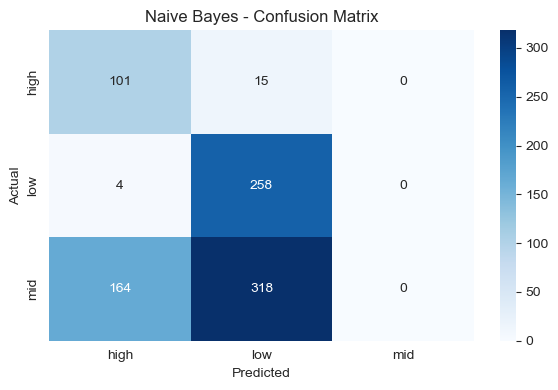

In [508]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": lr_preds1,
    "Random Forest": rf_preds1,
    "Naive Bayes": nb_preds1
}

labels_order = np.unique(y_test1)  # explicitly use your target test set

for name, preds in models.items():
    cm = confusion_matrix(y_test1, preds, labels=labels_order)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_order, yticklabels=labels_order)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()